# Homework 02 --- Session 3, Multilinear regression

### Completed by Jonathan Kastelan (jlk635)
### CUSP - Applied Data Science 2017

## EX 1 Artificial data (25pt -- 5+5+5+10)
### Dataset 'H31.csv'
### Tasks:
Consider a multivariate regression of the output variable $y$ over the 3 regressors $x_1$, $x_2$, $x_3$ as follows.
* (a) Which one of the regressors serves as dummy variable corresponding to an intercept term?
    * Ignore the first column since it's just a duplicate index (You can avoid it by running **ex1 = pd.read_csv('H31.csv', index_col=0)** )
* (b) Calculate the coefficients $\hat w$ manually or with python *numpy* module by using matrix computation.
* (c) Verify your answer by implementing the OLS regression function with python *statsmodels* module.
* (d) Visualize the data points and your fitted model in a 3D plot, like we did in the lab session.

In [1]:
## Import the cool packages for analysis

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D  # for 3D plot
%matplotlib inline


In [2]:
## Read in the data

ex1 = pd.read_csv('https://raw.githubusercontent.com/jkastelan/ADS2017_jlk635/master/HW2_jlk635/H31.csv',  index_col=0, header = 0)
ex1.head()


,y,x1,x2,x3
1,0,1,-2,1
2,2,-1,-1,1
3,2,0,0,1
4,3,-1,1,1
5,3,1,2,1


#### (a) Which one of the regressors serves as dummy variable corresponding to an intercept term?

The intercept term is $x_3$, identified because it has a 1 for each record (i.e. it's in every model)

#### (b) Calculate the coefficients $\hat w$ manually or with python *numpy* module by using matrix computation.

In [3]:
Y = np.array(ex1.loc[0:, "y"])
X = np.array(ex1.loc[0:, "x1":"x3"])


Using the matrix formula to solve for solution $\hat{w}$, expressed as:
$$
\hat{w}=\left(X^T X\right )^{-1}X^T Y. \hspace{5ex}
$$

In [4]:
w_hat = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)),X.T),Y)
w_hat

array([-0.5,  0.7,  2. ])

#### (c) Verify your answer by implementing the OLS regression function with python statsmodels module.

In [5]:
lm = smf.ols("y ~ x1 + x2 + x3 -1", data = ex1).fit()
lm.summary()

C:\Users\antho\Anaconda2\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     59.00
Date:                Mon, 23 Oct 2017   Prob (F-statistic):             0.0167
Time:                        11:50:10   Log-Likelihood:                 2.6854
No. Observations:                   5   AIC:                            0.6293
Df Residuals:                       2   BIC:                           -0.5424
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.5000      0.112     -4.472      0.047      -0.981      -0.019
x2             0.7000      0.071      9.899      0.010       0.396       1.004
x3             2.0000      0.100     20.000      0.002       1.570       2.430
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.600
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.352
Skew:                           0.000   Prob(JB):                        0.839
Kurtosis:                       1.700   Cond. No.                         1.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Comparing result of matrix multiplication (*w_hat*) and OLS fit (*lm*), we can see the coefficients in *lm* match the entries in *w_hat*.

#### (d) Visualize the data points and your fitted model in a 3D plot, like we did in the lab session

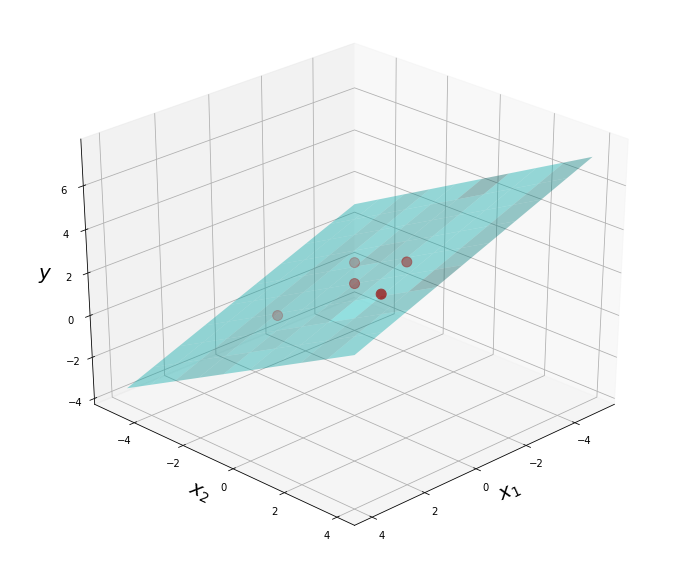

In [6]:
### Fancy visualisation

fig = plt.figure(figsize = (12,10))  # Create a plot with customized figure size (width, height)
ax = fig.gca(projection='3d')  # Extract the axis for further operations
ax.scatter(ex1.x1, ex1.x2, ex1.y, s = 100,  c = 'r')
# Scatter plot, "c" stands for color, and "s" determines the marker size

# Generate coordinates for hyperplane
radius = 5
x1, x2 = np.meshgrid(range(-radius,radius), range(-radius,radius))
fit_y = lm.params[0] * x1 + lm.params[1] * x2 +lm.params[2]

# alpha (between 0 and 1) controls the transparency with 0 being totally transparent
ax.plot_surface(x1, x2, fit_y, color='c', alpha = 0.4)
# Set labels and fontsize
ax.set_xlabel('$x_1$', fontsize = 20)
ax.set_ylabel('$x_2$', fontsize = 20)
ax.set_zlabel('$y$', fontsize = 20)

ax.view_init(azim = 45)   # Controls the viewing angle

## EX 2, Income vs Insurance coverage (35+10pt -- 10+10+5+10+10)
### Dataset 'IncomeInsReg.csv'
You are given the demographic data of insurance coverage in NYC, with the details:
* Zip code
* Per capita income
* Total population (for each zip code)
* Population with Insurance coverage
    * Population with Public Insurance coverage
    * Population with Private Insurance coverage
* Population with No Insurance coverage

### Tasks:
* (a) Verify that there are some people with BOTH public insurance and private insurance according to this data set, then create a new column containing such information
* (b) Modify the old data frame, or simply create a new one, such that this data frame contains (including but not limited to) the following information in each zipcode area:
    * IncomePerCapita
    * Total Population
    * Population with Public Insurance coverage ONLY
    * Population with Private Insurance coverage ONLY
    * Population with NO Insurance coverage
    * Population with BOTH types of Insurance coverage
* (c) Drop rows with NaN (if any) and convert all population counts into proportions (percentage of total population, with the form 58.3 instead of 0.583)
* (d) Regress over these proportions (the ones mentioned in part b, leave out "No Insurance Coverage") to predict income -- What interesting results do we have here? Briefly state what you've obtained.
#### Extra credit:
* (e) Visualize the observed income versus the predicted income, like what we did in the lab session. Does this fitted line look great or not? If you're not sure, check the correlation matrix and make a guess.

In [7]:
df2 = pd.read_csv('https://raw.githubusercontent.com/jkastelan/ADS2017_jlk635/master/HW2_jlk635/IncomeInsReg.csv', index_col=0,  header = 0)
df2.head()


,IncomePerCapita,TotalPop,WithCoverage,Public,Private,NoCoverage
Zipcode,,,,,,
10001,77512.0,22767,20809,5800,16795,1958
10002,26905.0,79490,70361,40139,35167,9129
10003,79088.0,56909,53135,8593,48522,3774
10004,98020.0,3024,2780,180,2705,244
10005,99633.0,7566,6996,122,6944,570


#### (a) Verify that there are some people with BOTH public insurance and private insurance according to this data set, then create a new column containing such information


In [8]:
ZIP1 = 10001
print("The total number of people with coverage in ZIP {} is: {}".format(ZIP1, df2.WithCoverage[ZIP1]))
print("In the same ZIP code, the number of people with Public coverage is {} and Private coverage is {}".format(df2.Public[ZIP1], df2.Private[ZIP1]))
print("The total of population with public coverage and population with private coverage is: {}".format(df2.Public[ZIP1] + df2.Private[ZIP1]))
print("This means a total of {} people have both public and private coverage.".format(df2.Public[ZIP1] + df2.Private[ZIP1] - df2.WithCoverage[ZIP1]))

df2['BothTypesCoverage'] = df2.Public + df2.Private - df2.WithCoverage
df2.head()

The total number of people with coverage in ZIP 10001 is: 20809
In the same ZIP code, the number of people with Public coverage is 5800 and Private coverage is 16795
The total of population with public coverage and population with private coverage is: 22595
This means a total of 1786 people have both public and private coverage.


,IncomePerCapita,TotalPop,WithCoverage,Public,Private,NoCoverage,BothTypesCoverage
Zipcode,,,,,,,
10001,77512.0,22767,20809,5800,16795,1958,1786
10002,26905.0,79490,70361,40139,35167,9129,4945
10003,79088.0,56909,53135,8593,48522,3774,3980
10004,98020.0,3024,2780,180,2705,244,105
10005,99633.0,7566,6996,122,6944,570,70


* #### (b) Modify the old data frame, or simply create a new one, such that this data frame contains (including but not limited to) the following information in each zipcode area:
    * IncomePerCapita
    * Total Population
    * Population with Public Insurance coverage ONLY
    * Population with Private Insurance coverage ONLY
    * Population with NO Insurance coverage
    * Population with BOTH types of Insurance coverage

In [9]:
df2['PublicOnly'] = df2.Public - df2.BothTypesCoverage
df2['PrivateOnly'] = df2.Private - df2.BothTypesCoverage
df2.head()

,IncomePerCapita,TotalPop,WithCoverage,Public,Private,NoCoverage,BothTypesCoverage,PublicOnly,PrivateOnly
Zipcode,,,,,,,,,
10001,77512.0,22767,20809,5800,16795,1958,1786,4014,15009
10002,26905.0,79490,70361,40139,35167,9129,4945,35194,30222
10003,79088.0,56909,53135,8593,48522,3774,3980,4613,44542
10004,98020.0,3024,2780,180,2705,244,105,75,2600
10005,99633.0,7566,6996,122,6944,570,70,52,6874


#### (c) Drop rows with NaN (if any) and convert all population counts into proportions (percentage of total population, with the form 58.3 instead of 0.583)

In [10]:
df2 = df2.dropna()

In [11]:
df2['NoCoveragePct'] = df2.NoCoverage / df2.TotalPop * 100
df2['PublicOnlyPct'] = df2.PublicOnly / df2.TotalPop * 100
df2['PrivateOnlyPct'] = df2.PrivateOnly / df2.TotalPop * 100
df2['BothTypesCoveragePct'] = df2.BothTypesCoverage  / df2.TotalPop * 100
df2.head()

,IncomePerCapita,TotalPop,WithCoverage,Public,Private,NoCoverage,BothTypesCoverage,PublicOnly,PrivateOnly,NoCoveragePct,PublicOnlyPct,PrivateOnlyPct,BothTypesCoveragePct
Zipcode,,,,,,,,,,,,,
10001,77512.0,22767,20809,5800,16795,1958,1786,4014,15009,8.600167,17.630781,65.924364,7.844687
10002,26905.0,79490,70361,40139,35167,9129,4945,35194,30222,11.484463,44.274752,38.019877,6.220908
10003,79088.0,56909,53135,8593,48522,3774,3980,4613,44542,6.631640,8.105923,78.268815,6.993621
10004,98020.0,3024,2780,180,2705,244,105,75,2600,8.068783,2.480159,85.978836,3.472222
10005,99633.0,7566,6996,122,6944,570,70,52,6874,7.533703,0.687285,90.853820,0.925192


#### (d) Regress over these proportions (the ones mentioned in part b, leave out "No Insurance Coverage") to predict income -- What interesting results do we have here? Briefly state what you've obtained.

In [12]:
InsuranceModelwIntercept = smf.ols("IncomePerCapita ~ PublicOnlyPct + PrivateOnlyPct + BothTypesCoveragePct", data = df2).fit()
InsuranceModelwIntercept.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        IncomePerCapita   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     97.17
Date:                Mon, 23 Oct 2017   Prob (F-statistic):           3.25e-37
Time:                        11:50:25   Log-Likelihood:                -2033.2
No. Observations:                 181   AIC:                             4074.
Df Residuals:                     177   BIC:                             4087.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -6.303e+04   2.76e+04     -2.280      0.024   -1.18e+05   -8485.237
PublicOnlyPct          385.7767    373.326      1.033      0.303    -350.966    1122.519
PrivateOnlyPct        1621.5031    299.395      5.416      0.000    1030.660    2212.346
BothTypesCoveragePct   911.0964    344.185      2.647      0.009     231.863    1590.330
==============================================================================
Omnibus:                       46.950   Durbin-Watson:                   1.164
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.094
Skew:                           1.213   Prob(JB):                     3.70e-21
Kurtosis:                       5.567   Cond. No.                     1.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The above preditive model shows average income per capita for the ZIP code would increase by USD385.78 for every percentage point increase in percentage of population with only public insurance. The income per capita would increase by USD1,621.50 for every percentage point increase in percentage of population who have Private Insurance only. For the population who have both types of insurance (Public and Private), the average income per capita for the ZIP code would increase by USD911.10 per percentage point increase in percentage of people with both types of insurance.

Let's see what happens with the model if we fit without the intercept. If the R-squared improves, we'll use this for better predictive power.


In [13]:
InsuranceModel = smf.ols("IncomePerCapita ~ PublicOnlyPct + PrivateOnlyPct + BothTypesCoveragePct -1", data = df2).fit()
InsuranceModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        IncomePerCapita   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     354.5
Date:                Mon, 23 Oct 2017   Prob (F-statistic):           8.42e-75
Time:                        11:50:30   Log-Likelihood:                -2035.8
No. Observations:                 181   AIC:                             4078.
Df Residuals:                     178   BIC:                             4087.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
PublicOnlyPct         -452.5241     65.882     -6.869      0.000    -582.534    -322.514
PrivateOnlyPct         946.1836     44.586     21.221      0.000     858.197    1034.170
BothTypesCoveragePct   353.5024    245.077      1.442      0.151    -130.127     837.132
==============================================================================
Omnibus:                       58.696   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.984
Skew:                           1.439   Prob(JB):                     1.80e-30
Kurtosis:                       6.143   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared improves from 0.622 to 0.857. This above preditive model shows average income per capita for the ZIP code would DECREASE by USD3452.52 for every percentage point increase in percentage of population with only public insurance. The income per capita would increase by USD946.18 for every percentage point increase in percentage of population who have Private Insurance only. For the population who have both types of insurance (Public and Private), the average income per capita for the ZIP code would increase by USD353.50 per percentage point increase in percentage of people with both types of insurance.

We'll use the model without the intercept.


**Extra credit:**

**(e) Visualize the observed income versus the predicted income, like what we did in the lab session. Does this fitted line look great or not? If you're not sure, check the correlation matrix and make a guess.**

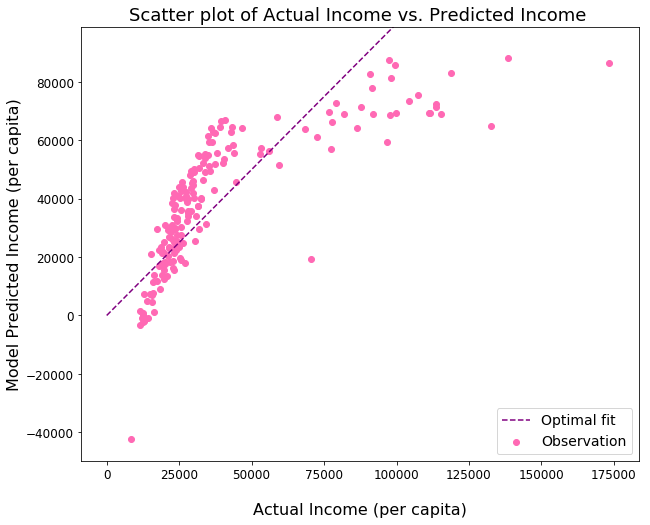

In [14]:
fig = plt.figure(figsize = (10,8))

InsModPredictions = InsuranceModel.predict(df2)
plt.scatter(df2.IncomePerCapita, InsModPredictions, color = 'HotPink', label = 'Observation')
xy = np.linspace(0, 175000, num=100)
plt.plot(xy,xy, '--', color = 'purple', Label = 'Optimal fit')
plt.title("Scatter plot of Actual Income vs. Predicted Income ", fontsize=18)
plt.xlabel("\nActual Income (per capita)", fontsize=16)
plt.ylabel("Model Predicted Income (per capita)", fontsize=16)
plt.legend(fontsize=14, loc="lower right")
plt.tick_params(axis='both',  labelsize=12)
plt.ylim(-50000,99000);

The scale on the above chart is adjusted below to make more conducive to analysis.

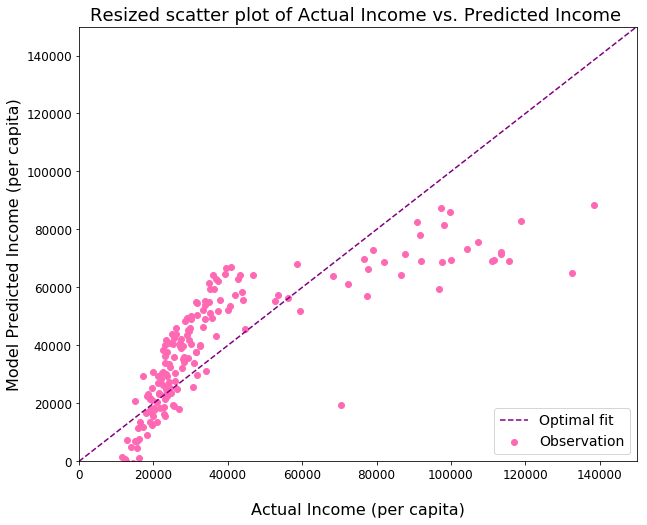

In [15]:
fig = plt.figure(figsize = (10,8))

InsModPredictions = InsuranceModel.predict(df2)
plt.scatter(df2.IncomePerCapita, InsModPredictions, color = 'HotPink', label = 'Observation')
xy = np.linspace(0, 175000, num=100)
plt.plot(xy,xy, '--', color = 'purple', Label = 'Optimal fit')
plt.title("Resized scatter plot of Actual Income vs. Predicted Income ", fontsize=18)
plt.xlabel("\nActual Income (per capita)", fontsize=16)
plt.ylabel("Model Predicted Income (per capita)", fontsize=16)
plt.legend(fontsize=14, loc="lower right")
plt.tick_params(axis='both',  labelsize=12)
plt.xlim(0,150000);
plt.ylim(0,150000);

The optimal fit (dotted purple line) shows where Actual income (per capita) equals the Model Predicted Income (per capita). The chart indicates for low actual Income (per capita), the model is underpredicting (because the point lie below the x=y line). For mid-range Actual incomes, the model is over-predicting incomes, as the points lie above the the x=y line. For the high Actual income (per capita), the model is underpredicting as the points lie below the Optimal fit (x=y) line.

In [16]:
df2Cut = df2.drop(['TotalPop', 'WithCoverage', 'Public', 'Private', 'NoCoverage', 'BothTypesCoverage', 'PublicOnly', 'PrivateOnly'],axis=1)
df2Cut.corr(method='pearson', min_periods=1)

,IncomePerCapita,NoCoveragePct,PublicOnlyPct,PrivateOnlyPct,BothTypesCoveragePct
IncomePerCapita,1.000000,-0.602753,-0.746417,0.778040,0.101578
NoCoveragePct,-0.602753,1.000000,0.556389,-0.679430,-0.344447
PublicOnlyPct,-0.746417,0.556389,1.000000,-0.940209,-0.201309
PrivateOnlyPct,0.778040,-0.679430,-0.940209,1.000000,-0.024644
BothTypesCoveragePct,0.101578,-0.344447,-0.201309,-0.024644,1.000000


A review of the correlation matrix above indicates there is strong correlation between some of the predictive variables (e.g. PrivateOnlyPct and PublicOnlyPct has strong negative correlation = -0.940209). This suggest there are factors which need to be acounted for in the model, and subsectioning some of the characteristic related to low, medium and high incomes if they can be identified.

## EX 3, Polynomial fit (40+30pt -- 4+5+3$\times$4+5+3$\times$3+5+30)

### Try to fit y with a polynomial $$\hat y(x,w) = \sum\limits_{i=1}^M w_i\cdot x^i$$ with the given dataset 'H33.csv'

### Tasks:
* (a) Draw the scatter plot of x and y, guess what polynomial could be the best choice. (The name "x1" denotes $x^1$.)
* (b) Create new columns in data frame to contain the information of $x^2, x^3, x^4$
* (c) Try to fit y with polynomial of x with order 1, 2, 3, 4, respectively
    * For each model, store your fitted parameters as well as your $R^2$
* (d) Report the $R^2$, plot it and observe how it changes
* (e) Create a figure with four (4) subfigures, one for each polynomial degree M = 1, 2, 3, 4. In each subfigure:
    * (e.1) Draw the original scatter plot of x1 and y
    * (e.2) Plot the curve of true function $f(x) = 9x^2 - x + 1$
    * (e.3) Plot your fitted curve of degree M, observe how our model fits the data as M increases
* (f) Based on the plot, which model(s) fits the true curve best? Then provide the best coefficients $\hat w$
### Extra credit
* (g) In each subfigure:
    * (g.1) Pick an x value (at your discretion) $x_0$, then locate the y value both on your fitted curve and on our function curve ($f(x_0)$)
    * (g.2) Mark these two points with a small diamond, then draw a dashed line connecting them, showing "prediction error"
    * (g.3) Repeat g.1 and g.2 up to ten times (i.e. select up to ten random different future points and predict their values, compare your prediction with the true value), then:
        * Compute the average sum of squares of errors $E = \frac{\sum_i^n (y_i - f(x_i))^2}{n}$ ($x_i$ denotes your future points), mention it in your subfigure's title (**Be sure to use the SAME future points for ALL 4 models when you calculate prediction error**)
        * Which model has the smallest average error $E$? Does this fitted polynomial coincides with the M you picked in part f?

In [17]:
## Read in the data

ex3 = pd.read_csv('https://raw.githubusercontent.com/jkastelan/ADS2017_jlk635/master/HW2_jlk635/H33.csv', header = 0)
ex3.head()


,y,x1
0,2.613388,-0.50
1,2.170351,-0.32
2,0.049546,-0.14
3,1.158258,0.04
4,1.397567,0.22


* #### (a) Draw the scatter plot of x and y, guess what polynomial could be the best choice. (The name "x1" denotes $x^1$.)

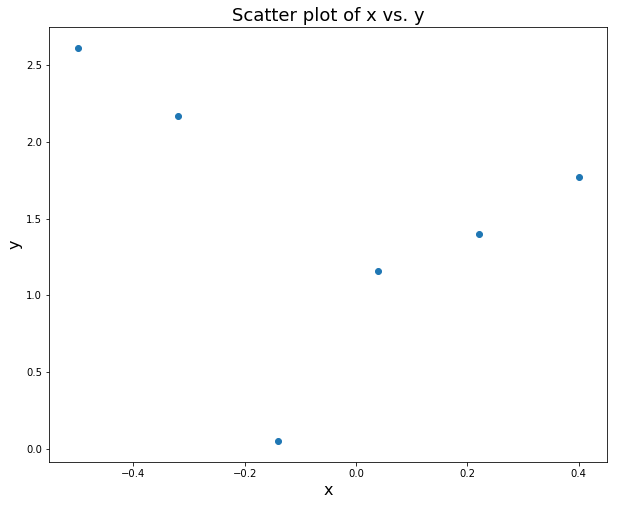

In [18]:
fig = plt.figure(figsize = (10,8))
plt.scatter(ex3.x1, ex3.y);
plt.title("Scatter plot of x vs. y", fontsize=18)
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16);


The best fitting polynomial would be a quartic function ($x^4$). A sextic ($x^6$) polynomial would fit the point perfectly as there are six data points, although the predictive power of this function wouldn't be very useful. A quadractic function may be best for prediction also (or even a line) - it depends on how variable the data points are.

#### (b) Create new columns in data frame to contain the information of  x2, x3, x4

In [19]:
ex3['x2'] =  ex3.x1 * ex3.x1  
ex3['x3'] =  ex3.x1 * ex3.x1 * ex3.x1 
ex3['x4'] =  ex3.x1 * ex3.x1 * ex3.x1 * ex3.x1 

* #### (c) Try to fit y with polynomial of x with order 1, 2, 3, 4, respectively
    * For each model, store your fitted parameters as well as your $R^2$

In [20]:
lm1=smf.ols('y~x1',data=ex3).fit()
lm2=smf.ols('y~x1+x2',data=ex3).fit()
lm3=smf.ols('y~x1+x2+x3',data=ex3).fit()
lm4=smf.ols('y~x1+x2+x3+x4',data=ex3).fit()

In [21]:
rSquared = [lm1.rsquared, lm2.rsquared, lm3.rsquared, lm4.rsquared]
Intercept = [lm1.params[0], lm2.params[0], lm3.params[0], lm4.params[0]]
x1Coeff = [lm1.params[1], lm2.params[1], lm3.params[1], lm4.params[1]]
x2Coeff = [0, lm2.params[2], lm3.params[2], lm4.params[2]]
x3Coeff = [0, 0, lm3.params[3], lm4.params[3]]
x4Coeff = [0, 0, 0, lm4.params[3]]
count = [1., 2., 3., 4.]

In [22]:
results = {'power': count, 'Rsqu': rSquared, 'Int': Intercept, 'x1C' : x1Coeff, 'x2C' : x2Coeff, 'x3C' : x3Coeff, 'x4C' : x4Coeff}
index = [0, 1, 2, 3]

regressDf = pd.DataFrame(data=results, index=index)


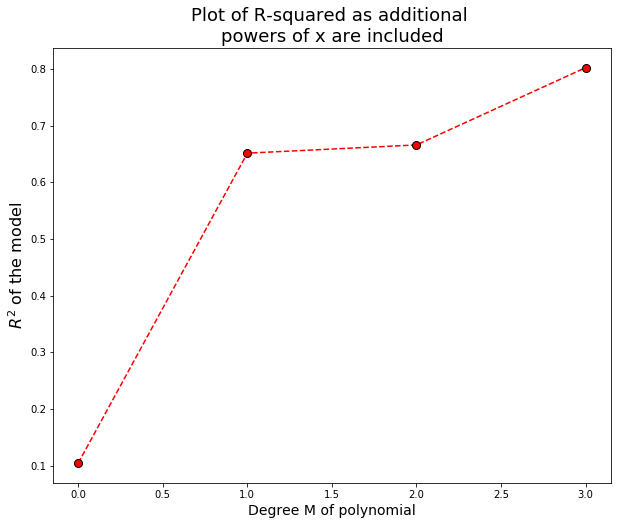

In [23]:

fig = plt.figure(figsize = (10,8))
plt.plot(range(0,4),regressDf.Rsqu,'ro--', markersize = 8, markeredgecolor='black')
plt.title("Plot of R-squared as additional \npowers of x are included", fontsize=18)
plt.xlabel('Degree M of polynomial', fontsize = 14)
plt.ylabel('$R^2$ of the model', fontsize = 16);

plt.show()

#### Comment:

* #### (e) Create a figure with four (4) subfigures, one for each polynomial degree M = 1, 2, 3, 4. In each subfigure:
    * (e.1) Draw the original scatter plot of x1 and y
    * (e.2) Plot the curve of true function $f(x) = 9x^2 - x + 1$
    * (e.3) Plot your fitted curve of degree M, observe how our model fits the data as M increases

In [24]:
## Calculations for extra credit part (g)

x = np.linspace(min(ex3.x1), max(ex3.x1), 100)

np.random.seed(444)
xSamp = np.random.choice(x,10)

SS1 = np.zeros(len(xSamp))
SS2 = np.zeros(len(xSamp))
SS3 = np.zeros(len(xSamp))
SS4 = np.zeros(len(xSamp))

for i, x in enumerate(xSamp):
    yTrue = 9 * x * x  - x + 1
    yFit = regressDf.x1C[0] * x + regressDf.Int[0]
    SS1[i] = (yTrue - yFit) ** 2
    
for i, x in enumerate(xSamp):
    yTrue = 9 * x * x  - x + 1
    yFit = regressDf.x2C[1] * x * x + regressDf.x1C[1] * x + regressDf.Int[1]
    SS2[i] = (yTrue - yFit) ** 2
    
for i, x in enumerate(xSamp):
    yTrue = 9 * x * x  - x + 1
    yFit = regressDf.x3C[2] * x * x * x + regressDf.x2C[2] * x * x + regressDf.x1C[2] * x + regressDf.Int[2]
    SS3[i] = (yTrue - yFit) ** 2

for i, x in enumerate(xSamp):
    yTrue = 9 * x * x  - x + 1
    yFit = regressDf.x4C[3] * x * x * x * x + regressDf.x3C[3] * x * x * x + regressDf.x2C[3] * x * x + regressDf.x1C[3] * x + regressDf.Int[3]
    SS4[i] = (yTrue - yFit) ** 2
    
print("The average sum of squared errors for the line fit is: {}".format(SS1.sum() / len(SS1)))
print("The average sum of squared errors for the quadratic fit is: {}".format(SS2.sum() / len(SS2)))
print("The average sum of squared errors for the cubic fit is: {}".format(SS3.sum() / len(SS3)))
print("The average sum of squared errors for the quartic fit is: {}".format(SS4.sum() / len(SS4)))



The average sum of squared errors for the line fit is: 0.698824010859
The average sum of squared errors for the quadratic fit is: 0.355509808474
The average sum of squared errors for the cubic fit is: 0.398235752485
The average sum of squared errors for the quartic fit is: 0.993932364253


In [25]:
#Plotting diamonds

a = xSamp[4]
yTrue = 9 * a * a  - a + 1

yFit1 = regressDf.x1C[0] * a + regressDf.Int[0]
yFit2 = regressDf.x2C[1] * a * a + regressDf.x1C[1] * a + regressDf.Int[1]
yFit3 = regressDf.x3C[2] * a * a * a + regressDf.x2C[2] * a * a + regressDf.x1C[2] * a + regressDf.Int[2]
yFit4 = regressDf.x4C[3] * a * a * a * a + regressDf.x3C[3] * a * a * a + regressDf.x2C[3] * a * a + regressDf.x1C[3] * a + regressDf.Int[3]
    


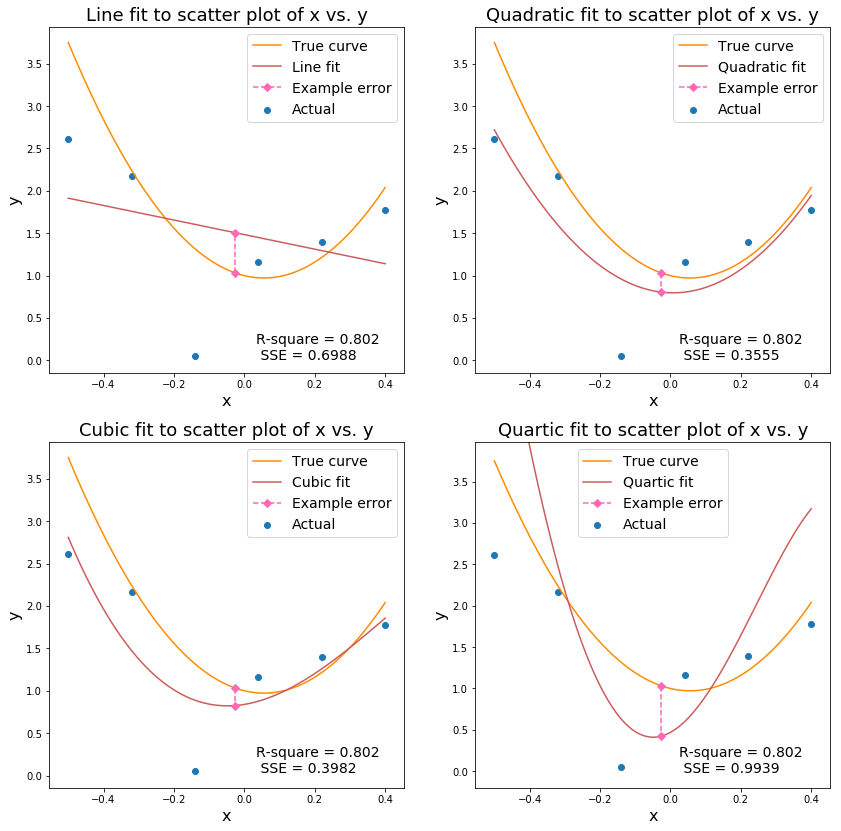

In [26]:
plt.figure(figsize=(14,14))

x = np.linspace(min(ex3.x1), max(ex3.x1), 100)

ax = plt.subplot(221)


plt.scatter(ex3.x1, ex3.y, label='Actual');
plt.plot(x, 9 * x * x  - x + 1, color = 'DarkOrange', label='True curve')
plt.plot(x, regressDf.x1C[0] * x + regressDf.Int[0], color = 'IndianRed', label='Line fit')
plt.plot((a,a), (yTrue,yFit1), '--D', color = 'HotPink', label='Example error')
plt.title("Line fit to scatter plot of x vs. y", fontsize=18)
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.legend(fontsize=14) 
plt.figtext(.33, .55, "R-square = {} \n SSE = {}".format(round(regressDf.Rsqu[3],4), round(SS1.sum() / len(SS1),4)), fontsize=14)


ax = plt.subplot(222)

plt.scatter(ex3.x1, ex3.y, label='Actual');
plt.plot(x, 9 * x * x  - x + 1, color = 'DarkOrange', label='True curve')
plt.plot(x, regressDf.x2C[1] * x * x + regressDf.x1C[1] * x + regressDf.Int[1], color = 'IndianRed', label='Quadratic fit')
plt.plot((a,a), (yTrue,yFit2), '--D', color = 'HotPink', label='Example error')
plt.title("Quadratic fit to scatter plot of x vs. y", fontsize=18)
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.legend(fontsize=14) 
plt.figtext(.75, .55, "R-square = {} \n SSE = {}".format(round(regressDf.Rsqu[3],4), round(SS2.sum() / len(SS2),4)), fontsize=14)

ax = plt.subplot(223)

plt.scatter(ex3.x1, ex3.y, label='Actual');
plt.plot(x, 9 * x * x  - x + 1, color = 'DarkOrange', label='True curve')
plt.plot(x, regressDf.x3C[2] * x * x * x + regressDf.x2C[2] * x * x + regressDf.x1C[2] * x + regressDf.Int[2], color = 'IndianRed', label='Cubic fit')
plt.plot((a,a), (yTrue,yFit3), '--D', color = 'HotPink', label='Example error')
plt.title("Cubic fit to scatter plot of x vs. y", fontsize=18)
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.legend(fontsize=14) 
plt.figtext(.33, .14, "R-square = {} \n SSE = {}".format(round(regressDf.Rsqu[3],4), round(SS3.sum() / len(SS3),4)), fontsize=14)

ax = plt.subplot(224)

plt.scatter(ex3.x1, ex3.y, label='Actual');
plt.plot(x, 9 * x * x  - x + 1, color = 'DarkOrange', label='True curve')
plt.plot(x, regressDf.x4C[3] * x * x * x * x + regressDf.x3C[3] * x * x * x + regressDf.x2C[3] * x * x + regressDf.x1C[3] * x + regressDf.Int[3], color = 'IndianRed', label='Quartic fit')
plt.plot((a,a), (yTrue,yFit4), '--D', color = 'HotPink', label='Example error')
plt.title("Quartic fit to scatter plot of x vs. y", fontsize=18)
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.ylim(-0.2, 3.98)
plt.legend(fontsize=14) 
plt.figtext(.75, .14, "R-square = {} \n SSE = {}".format(round(regressDf.Rsqu[3],4), round(SS4.sum() / len(SS4),4)), fontsize=14);

#### (f) Based on the plot, which model(s) fits the true curve best? Then provide the best coefficients  ŵ 

Based on the plot, the quadratic and the cubic fit the true curve best. Given they are very similar, choose the simpler model (principle of parsimony), namely the quadratic. It has the equation $f(x) = 7.459x^2 - 0.1129x + 0.7979$

# ANALYSIS COMPLETED ABOVE
### Extra credit
* (g) In each subfigure:
    * (g.1) Pick an x value (at your discretion) $x_0$, then locate the y value both on your fitted curve and on our function curve ($f(x_0)$)
    * (g.2) Mark these two points with a small diamond, then draw a dashed line connecting them, showing "prediction error"
    * (g.3) Repeat g.1 and g.2 up to ten times (i.e. select up to ten random different future points and predict their values, compare your prediction with the true value), then:
        * Compute the average sum of squares of errors $E = \frac{\sum_i^n (y_i - f(x_i))^2}{n}$ ($x_i$ denotes your future points), mention it in your subfigure's title (**Be sure to use the SAME future points for ALL 4 models when you calculate prediction error**)
        * Which model has the smallest average error $E$? Does this fitted polynomial coincides with the M you picked in part f?

**The model with the smallest prediction error is the quadratic. It coincides with the model chosen in part (f).**